MACS 30100 HW2
Fangfang Wan

In [185]:
import numpy as np
import scipy.stats as sts

Question 1

In [186]:
income = np.loadtxt('incomes.txt')

(a)

<IPython.core.display.Javascript object>


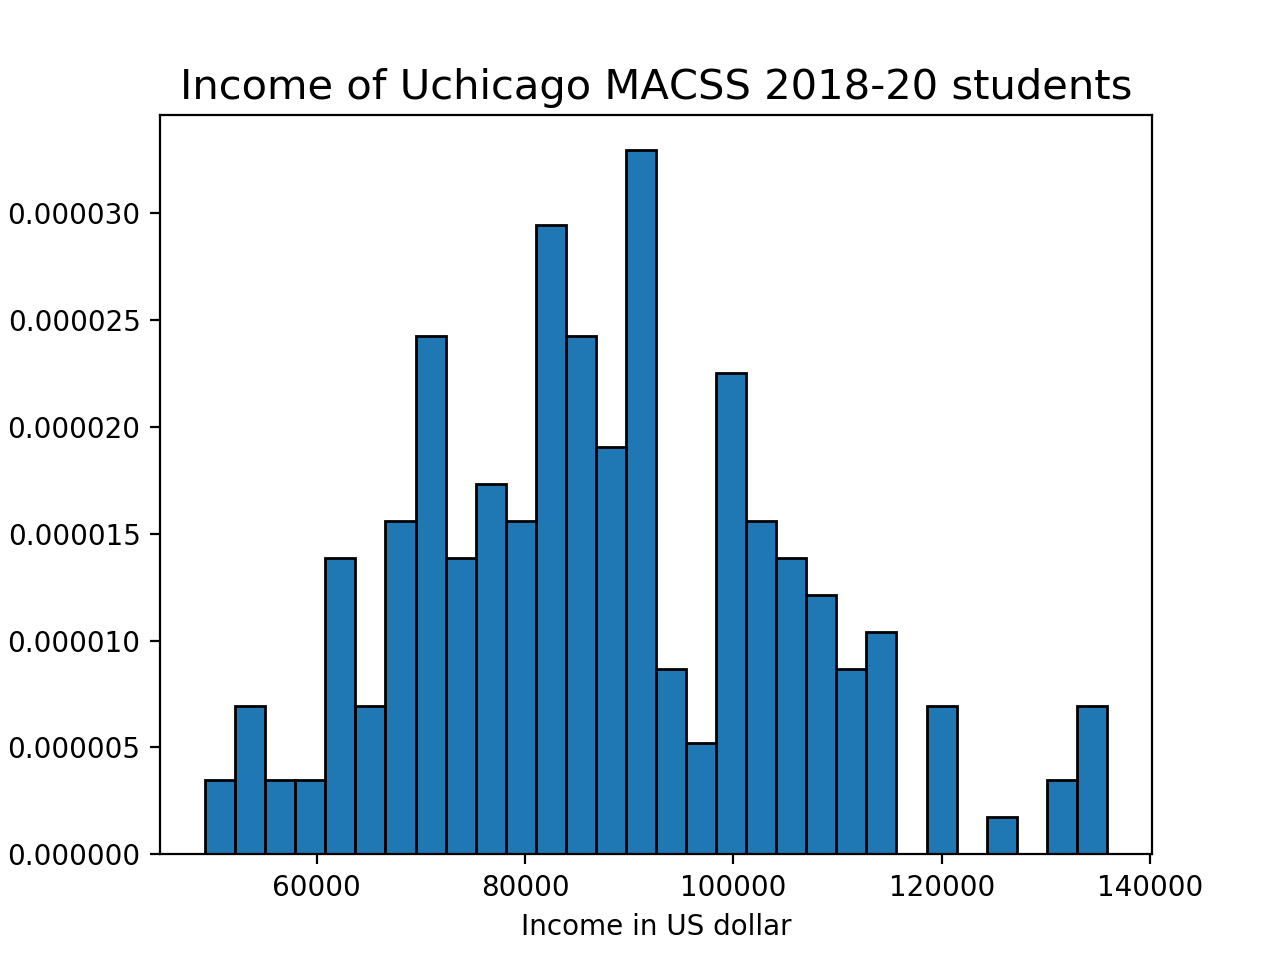

Text(0,0.5,'Percent of students')

In [187]:
import matplotlib.pyplot as plt
%matplotlib notebook
count, bins, ignored = plt.hist(income, 30, edgecolor='black', normed=True)
plt.title('Income of Uchicago MACSS 2018-20 students', fontsize=15)
plt.xlabel('Income in US dollar')
plt.ylabel('Percent of students')

(b)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


<IPython.core.display.Javascript object>


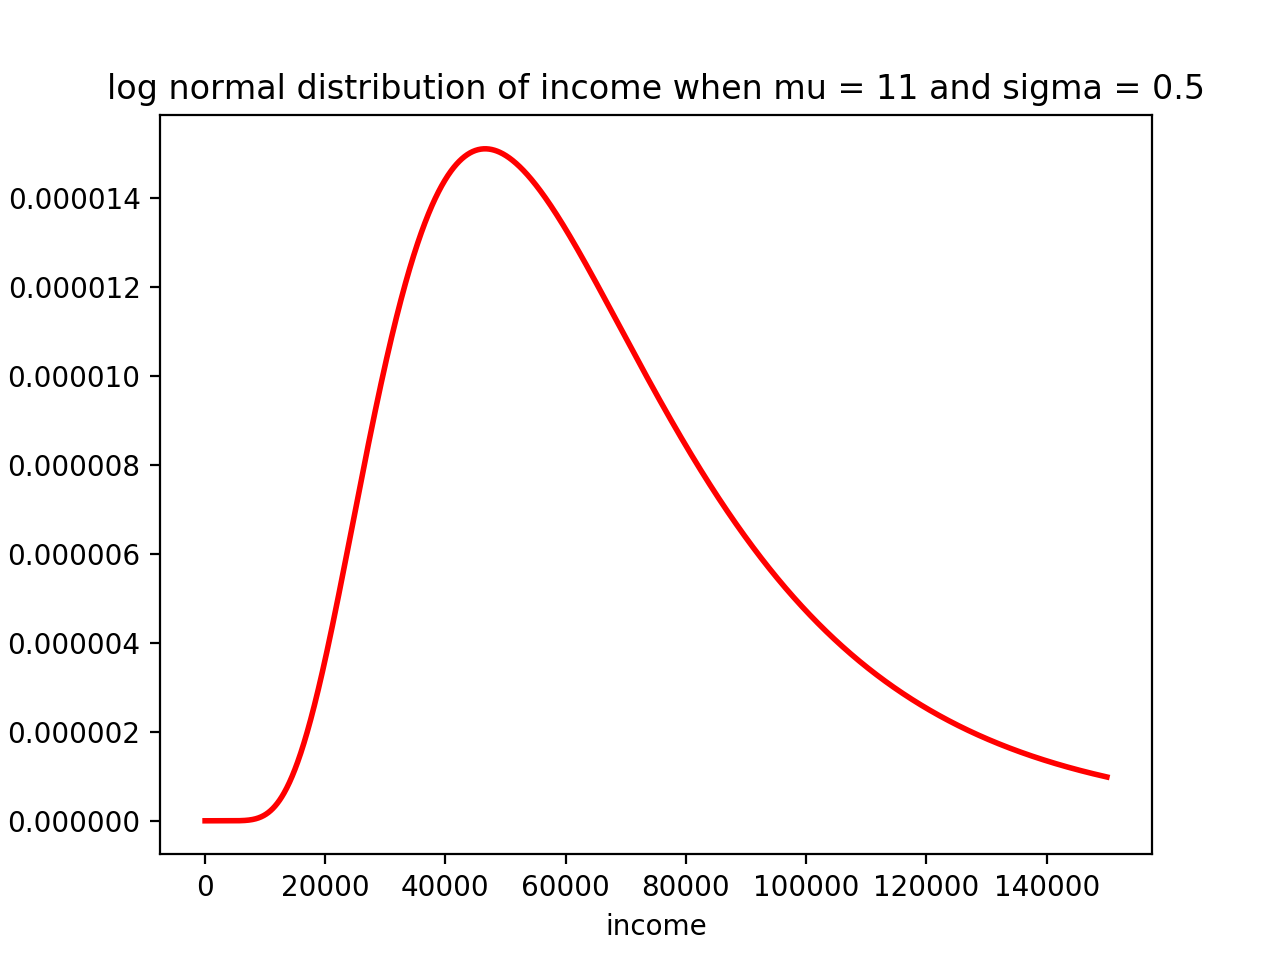

In [188]:
def truncnorm_pdf(xvals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the truncated normal pdf with mean mu and
    standard deviation sigma. If the cutoff is finite, then the PDF
    values are inflated upward to reflect the zero probability on values
    above the cutoff. If there is no cutoff given or if it is given as
    infinity, this function does the same thing as
    sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar 
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
            
    pdf_vals = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals


dist_pts = np.linspace(0, 150000, 2000)
mu = 11
sig = 0.5
%matplotlib notebook
plt.plot(dist_pts, truncnorm_pdf(dist_pts, mu, sig, 150000),linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.xlabel('income')
plt.ylabel('density')
plt.title('log normal distribution of income when mu = 11 and sigma = 0.5')
plt.show()

In [189]:
def log_lik_truncnorm(xvals, mu, sigma, cutoff):

    pdf_vals = truncnorm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

log_lik_truncnorm(income, mu, sig, 150000)

-2385.8569978085579

The log_liklihood is -2385.8569978085579

(3)

In [190]:
def crit(params, *args):
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_truncnorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [191]:
import scipy.optimize as opt

mu_init = 11 
sig_init = 0.5 
params_init = np.array([mu_init, sig_init])
mle_args = (income, 150000)
results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((0.1, None), (0.1, None)))
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 11.3590243967  sig_MLE= 0.208178530156


<IPython.core.display.Javascript object>


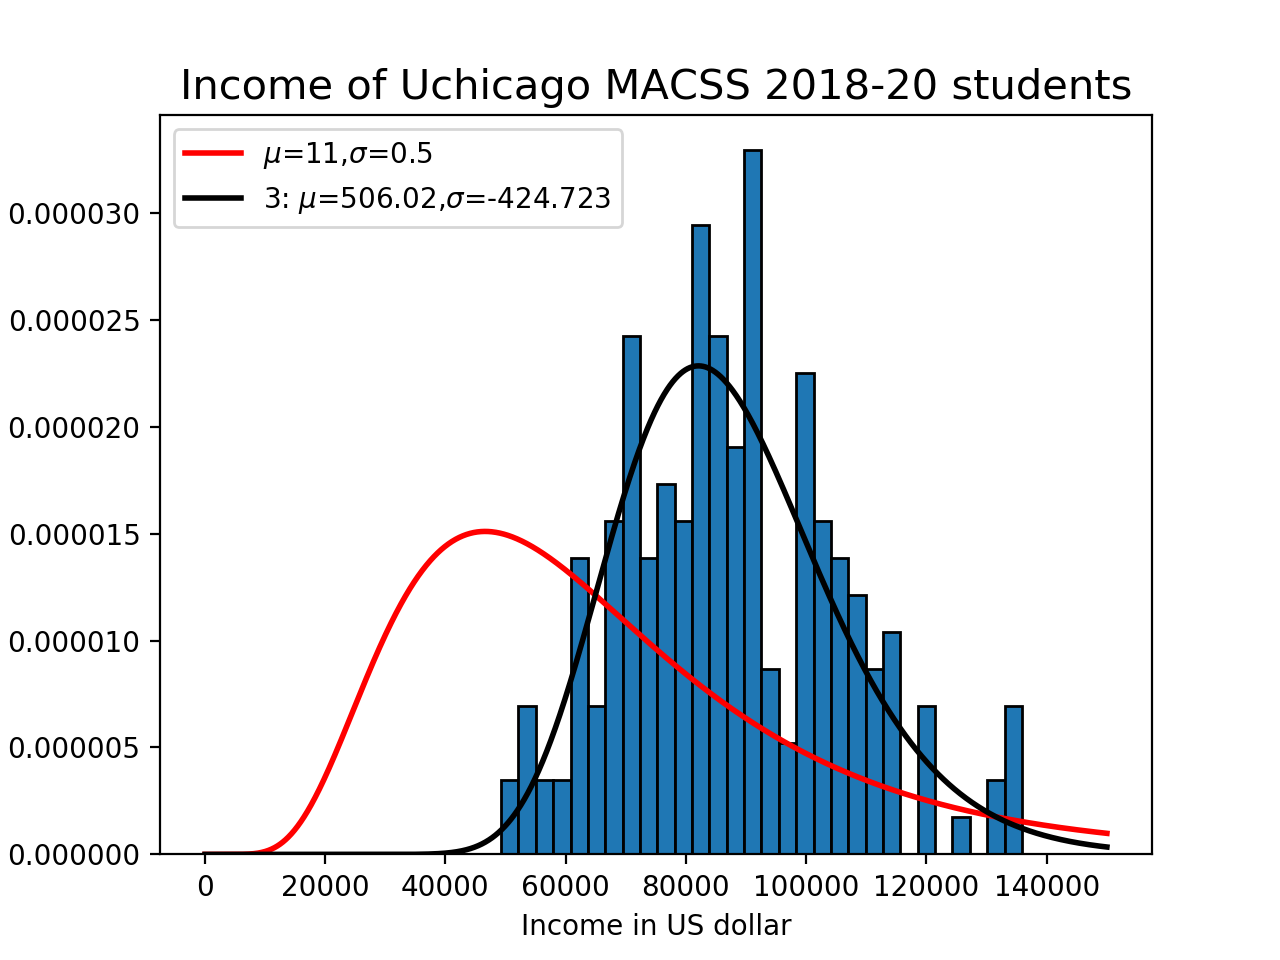

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply


In [192]:
# histogram from part(a)
%matplotlib notebook
count, bins, ignored = plt.hist(income, 30, edgecolor='black', normed=True)
plt.title('Income of Uchicago MACSS 2018-20 students', fontsize=15)
plt.xlabel('Income in US dollar')
plt.ylabel('Percent of students')

# pdf from (b)
plt.plot(dist_pts, truncnorm_pdf(dist_pts, mu, sig, 150000),linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')

# Plot the MLE estimated distribution
plt.plot(dist_pts, truncnorm_pdf(dist_pts, mu_MLE, sig_MLE, 150000),
         linewidth=2, color='k', label='3: $\mu$=506.02,$\sigma$=-424.723')
plt.legend(loc='upper left')

In [193]:
log_likelihood_MLE = log_lik_truncnorm(income, 11.4950161025, 0.310879215015, 150000)
print('The log likelihood of MLE is', log_likelihood_MLE)

The log likelihood of MLE is -2285.89995452


In [194]:
results
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('Variance-Covariance matrix of MLE = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

Variance-Covariance matrix of MLE =  [[ 0.00022521 -0.00022521]
 [-0.00010284  0.00010284]]
Standard error for mu estimate =  0.0150070140551
Standard error for sigma estimate =  0.0101408188183


(d)

In [195]:
log_lik_h0 = log_lik_truncnorm(income, mu, sig, 150000)
log_lik_mle = log_lik_truncnorm(income, mu_MLE, sig_MLE, 150000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value =', pval_h0, 'so we reject the null hypothesis.')

chi squared of H0 with 2 degrees of freedom p-value = 0.0 so we reject the null hypothesis.


(e)

In [196]:
print('The probability of earning more than $100,000 is', 
      1-sts.lognorm.cdf(100000, sig_MLE, loc=mu_MLE, scale=np.exp(mu_MLE)))
print('The probability of earning less than $75,000 is',
      sts.lognorm.cdf(75000, sig_MLE, loc=mu_MLE, scale=np.exp(mu_MLE)))

The probability of earning more than $100,000 is 0.230035853139
The probability of earning less than $75,000 is 0.259997244539


Question 2

In [197]:
import pandas as pd
dataset = pd.read_csv('sick.txt')
sick = dataset['sick']
age = dataset['age']
children = dataset['children']
avgtemp_winter = dataset['avgtemp_winter']
num_observations = len(sick)

In [198]:
def error_term(parameters, sick, age, children, avgtemp_winter):
    beta_0, beta_1, beta_2, beta_3, sigma = parameters
    err = sick - beta_0 - beta_1 * age - beta_2 * children - beta_3 * avgtemp_winter
    return err

In [199]:
# Define log likelihood function for the normal distribution of error term
def log_lik_norm_error(parameters, sick, age, children, avgtemp_winter, num_observations):
    beta_0, beta_1, beta_2, beta_3, sigma = parameters
    error = error_term(parameters, sick, age, children, avgtemp_winter)
    log_lik_val = (-num_observations/2) * np.log(2 * np.pi) - \
    (num_observations/2) * np.log(sigma**2)\
    - (1 / (2 * sigma**2)) * np.sum(error ** 2)
    
    return log_lik_val

In [200]:
def crit_error(parameters, sick, age, children, avgtemp_winter):
    beta_0, beta_1, beta_2, beta_3, sigma = parameters
    sick, age, children, avgtemp_winter = var
    log_lik_val = log_lik_norm_error(parameters, sick, age, children, avgtemp_winter, \
                                     num_observations)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

In [201]:
import scipy.optimize as opt
mu_init = 0  
sig_init = 0.1  
beta_0_init = 0
beta_1_init = 0
beta_2_init = 0
beta_3_init = 0
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, beta_3_init, sig_init])
mle_args = (sick, age, children, avgtemp_winter)
b = bounds=((None, None), (None, None), (None, None), (None, None), (0.001, None))
results = opt.minimize(crit_error, params_init, args=mle_args, method='L-BFGS-B', bounds=b)
                       
beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sig_MLE= results.x
print('beta_0_MLE =', beta_0_MLE, 'beta_1_MLE =', beta_1_MLE, "beta_2_MLE = ", beta_2_MLE, \
      "beta_3_MLE =", beta_3_MLE, 'sig_MLE=', sig_MLE)

beta_0_MLE = 0.251644720597 beta_1_MLE = 0.0129334548355 beta_2_MLE =  0.400501165567 beta_3_MLE = -0.00999169894945 sig_MLE= 0.00301766278664


In [202]:
print('The Log-likelihood is: ', log_lik_norm_error((beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sig_MLE),\
                                                    sick, age, children, \
                                                    avgtemp_winter, num_observations))

The Log-likelihood is:  876.865063801


In [203]:
off_diag_neg = np.eye(5)*2-1
vcv_mle_error = results.hess_inv.todense() * off_diag_neg
print('Variance-covariance matrix of MLE = ', vcv_mle_error)

Variance-covariance matrix of MLE =  [[ 671.3877015   -57.31454015  580.36576372   46.7946186   124.20705795]
 [ -57.31454015    5.01053325   50.7308228     4.05582952   10.98879228]
 [ 580.36576372   50.7308228   513.64197852  -41.06625693 -111.25358815]
 [  46.7946186     4.05582952  -41.06625693    3.29321393   -8.8571049 ]
 [ 124.20705795   10.98879228 -111.25358815   -8.8571049    24.24097656]]


(b)

In [204]:
log_lik_h0 = log_lik_norm_error((1 ,0, 0, 0, 0.1), sick, age, 
                                 children, avgtemp_winter, num_observations)
log_lik_mle = log_lik_norm_error((beta_0_MLE, beta_1_MLE, beta_2_MLE, beta_3_MLE, sig_MLE), \
                                 sick, age, children, avgtemp_winter, num_observations)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0, 
      "so we reject the hypothesis that age, children and average temperature in winter have no effect on sick days")

chi squared of H0 with 2 degrees of freedom p-value =  0.0 so we reject the hypothesis that age, children and average temperature in winter have no effect on sick days
